In [17]:
from qiskit import *
from qiskit import quantum_info
import qiskit.visualization as viz
import numpy as np
import matplotlib.pyplot as plt


# Operadores Lineales



Todas las compeurta cuánticas son operadores lineales que se reprensant con una matriz. Es decir funciones que nos llevan de un espacio a otro espacio.

## Density Operator

$$\ket{\psi} = a_0\ket{0} + a_1\ket{1}$$
$$p_{\psi}=\ket{\psi}\bra{\psi}$$
$$p_{\psi}=\begin{bmatrix}a_0^*a_0&a_1^*a_0\\a_0^*a_1&a_1^*a_1\end{bmatrix}$$

Propiedades del operador densidad:

- La traza o suma de la diagonal principal es 1:

$$Tr(p_{\psi}=1)$$

- Si multiplicamos esta matriz por si misma, dara la misma matriz,es posible proyectarse:

$$p_{\psi}^2= p_{\psi}$$

- La adjunta es igual a si misma:

$$p_{\psi}^{\dag}= p_{\psi}$$

- Valores mayores que cero:

$$p_{\psi}>0$$

### Matriz de densidad de un estao cuántico puro.

- Si queremos expectation values de las mediciones, multiplicamos nuestra matriz $p_{\psi}$ por una **matriz de densidad** y a esto le tomamos su traza:

$$\braket{A}=Tr(Ap_{\psi})$$

$$\braket{M_0}=Tr(M_0p_{\psi})$$

Ejemplo:

Tenemos un qubit en el estado de superposición y queremos calcular la matriz de densidad de este Qubit

$$\ket{\psi}=\frac{1}{\sqrt{2}}\ket{0}+\frac{1}{\sqrt{2}}\ket{1}$$

Nuestro valor $p_{\psi}$ es una matriz :

$$p_{\psi}=\begin{bmatrix}\frac{1}{2}&\frac{1}{2}\\\frac{1}{2}&\frac{1}{2}\end{bmatrix}$$
....

# Matriz de densidad

Veamos un que pasa cuando tenemos dos qubits juntos y queremos tener una matriz de densidad de un estado puro en superposición:

$$\ket{\psi\phi}=c_1\ket{00}+c_1\ket{01}+c_2\ket{10}+c_2\ket{11}$$

La matriz $p_{\psi\phi}$ estaría definida por el producto externo de:

$$p_{\psi\phi} = \ket{\psi} \bra{\phi}$$

$$p_{\psi\phi}=\begin{bmatrix}c_0^*c_0&c_1^*c_0&c_2^*c_0&c_3^*c_0\\c_0^*c_1&c_1^*c_1&c_2^*c_1&c_3^*c_1\\c_0^*c_2&c_1^*c_2&c_2^*c_2&c_3^*c_2\\c_0^*c_3&c_1^*c_3&c_2^*c_3&c_3^*c_3\end{bmatrix}=p_{\phi}\otimes p_{\phi}$$

Podemos realizar el calclulo de la matriz de densidad para un qubit en entrelazado, en los diferrentes estados de Bell, tomemos como ejemplo la siguiente matriz:

$$\ket{B_0}=\frac{1}{\sqrt{2}}\ket{00}+\frac{1}{\sqrt{2}}\ket{11}$$

$$p_{B_0}=\ket{B_0} \bra{B_0}$$
$$p_{B_0}=\begin{bmatrix}\frac{1}{2}&0&0&\frac{1}{2}\\0&0&0&0\\\frac{1}{2}&0&0&0\\\frac{1}{2}&0&0&\frac{1}{2}\end{bmatrix}$$

Podemos calcular el estado de bell-1 $B_1$:


$$\ket{B_1}=\frac{1}{\sqrt{2}}\ket{01}+\frac{1}{\sqrt{2}}\ket{10}$$

$$p_{B_1}=\ket{B_1} \bra{B_1}$$
$$p_{B_1}=\begin{bmatrix}0&0&0&0\\0&\frac{1}{2}&\frac{1}{2}&0\\0&\frac{1}{2}&\frac{1}{2}&0\\0&0&0&0\end{bmatrix}$$




## Estados Mixtos

Es importante notar qu eno siempre tendremos nuestro estado de maenra pura, es decir  imaginemo suna caja con multiples estados, pero estos no se encuentran en superposición

Tenemos un 50% para qubits en un estado $\ket{0}$ y 50% para $\ket{1}$, ¿Como calcular la matriz de densidad?
Es posible si multiplicamos la probabilidad de tomar un qubit de estos por nuestra matriz cero:

$$p_o = \begin{bmatrix}\frac{1}{2}&0\\0&\frac{1}{2}\end{bmatrix} $$

$$\ket{0}\bra{0} =\begin{bmatrix}1&0\\0&0\end{bmatrix}$$

$$\ket{1}\bra{1} =\begin{bmatrix}0&0\\0&1\end{bmatrix}$$

$$p_{\psi} = \begin{bmatrix}\frac{1}{2}&\frac{1}{2}\\\frac{1}{2}&\frac{1}{2}\end{bmatrix} $$

Aquí tenemos un qubit con un estado fijo $\ket{\psi}$ y nuestro otro qubit tiene un 50% de ser 0 o 1.


¿Porqué nacen estos estados mixtos?

## Compuerta cuántica aplciada a una matriz de densidad


Tenenemos un qubit en estado puro en determinado circuito, y queremos operar su matriz de densidad con una compuerta cuántica $U$ cualquiera:

- Density matrix: $p$

$$p=\ket{\psi}\bra{\psi}$$

- Quantum Gate $U$

$$UpU^{\dag}=U\ket{\psi}\bra{\psi}U^{\dag}=  (U\ket{\psi}^{\dag})(U\ket{\psi}^{\dag}) $$

In [10]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

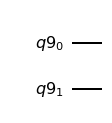

In [11]:
qc.draw(output='mpl')

La función initialize del circuito...

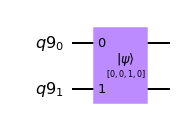

In [12]:
qc.initialize([0,0,1,0], qr)
qc.draw(output='mpl')

Antes de superponer a nuestro qubit,¿podemos encontrar nuestra matri de densidad?

In [13]:
backend = Aer.get_backend('statevector_simulator')
initial_state = execute(qc, backend).result().get_statevector()
initial_state

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


Añadimos las compuertas de hadarmad y cnot gate

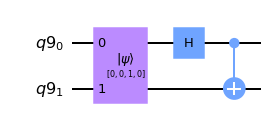

In [14]:
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [15]:
# Bell state:
bell_state = execute(qc, backend).result().get_statevector()
bell_state

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [18]:
# Calculamos matriz de densidad
quantum_info.DensityMatrix(initial_state)

DensityMatrix([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


In [23]:
# Calculamos matriz de densidad
quantum_info.DensityMatrix(bell_state)

DensityMatrix([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
              dims=(2, 2))
